In [18]:
import random
import random
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sn
from numpy import std
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
%cd Z:\PPMI_Data\Excels\Raw_And_More
Cpg_File = pd.read_csv ("beta_post_Funnorm_PPMI_EPICn524final030618.csv")
Cpg_File.head(3)

,200973410159_R03C01,200991620021_R01C01,200991620021_R03C01,200989060105_R03C01,200989060135_R07C01,200989060162_R04C01,200973410167_R04C01,200973410143_R01C01,200973410143_R06C01,200973410167_R05C01,...,200989060089_R02C01,200989060089_R01C01,200989060089_R04C01,200973410143_R08C01,200973410143_R07C01,200989060089_R03C01,200989060150_R04C01,200989060150_R05C01,200989060150_R06C01,200991620049_R08C01
cg14817997,0.834027,0.849201,0.772995,0.885288,0.772547,0.756429,0.719766,0.775910,0.768914,0.759352,...,0.788239,0.838946,0.845263,0.770405,0.852917,0.783813,0.806930,0.875691,0.661276,0.737917
cg26928153,0.945589,0.948538,0.962199,0.944048,0.926306,0.956061,0.912988,0.955983,0.957120,0.897589,...,0.951206,0.958975,0.957062,0.954738,0.947765,0.958086,0.948044,0.942405,0.954990,0.946272
cg16269199,0.845186,0.911488,0.948206,0.913622,0.778551,0.903924,0.742258,0.934683,0.897787,0.741083,...,0.889774,0.899517,0.908055,0.946297,0.910522,0.895500,0.889243,0.825368,0.913328,0.898812


In [3]:
Cpg_File.index.name ='CpG'
Cpg_File.reset_index(inplace=True)
Cpg_File.head(3)

,CpG,200973410159_R03C01,200991620021_R01C01,200991620021_R03C01,200989060105_R03C01,200989060135_R07C01,200989060162_R04C01,200973410167_R04C01,200973410143_R01C01,200973410143_R06C01,...,200989060089_R02C01,200989060089_R01C01,200989060089_R04C01,200973410143_R08C01,200973410143_R07C01,200989060089_R03C01,200989060150_R04C01,200989060150_R05C01,200989060150_R06C01,200991620049_R08C01
0,cg14817997,0.834027,0.849201,0.772995,0.885288,0.772547,0.756429,0.719766,0.775910,0.768914,...,0.788239,0.838946,0.845263,0.770405,0.852917,0.783813,0.806930,0.875691,0.661276,0.737917
1,cg26928153,0.945589,0.948538,0.962199,0.944048,0.926306,0.956061,0.912988,0.955983,0.957120,...,0.951206,0.958975,0.957062,0.954738,0.947765,0.958086,0.948044,0.942405,0.954990,0.946272
2,cg16269199,0.845186,0.911488,0.948206,0.913622,0.778551,0.903924,0.742258,0.934683,0.897787,...,0.889774,0.899517,0.908055,0.946297,0.910522,0.895500,0.889243,0.825368,0.913328,0.898812


In [4]:
%cd Z:\PPMI_Data\Excels\NonMotors\Derived250\Male\GeneCpG\Top50_allFeats
df1 = pd.read_csv ("List_Top50FromEachFeat_Male.csv")
df3 = pd.merge (df1, Cpg_File, on= "CpG", how= "inner")
print(df3.shape)
df3.head(2)

Z:\PPMI_Data\Excels\NonMotors\Derived250\Male\GeneCpG\Top50_allFeats
(323, 525)


,CpG,200973410159_R03C01,200991620021_R01C01,200991620021_R03C01,200989060105_R03C01,200989060135_R07C01,200989060162_R04C01,200973410167_R04C01,200973410143_R01C01,200973410143_R06C01,...,200989060089_R02C01,200989060089_R01C01,200989060089_R04C01,200973410143_R08C01,200973410143_R07C01,200989060089_R03C01,200989060150_R04C01,200989060150_R05C01,200989060150_R06C01,200991620049_R08C01
0,cg00035237,0.013305,0.014263,0.012499,0.013720,0.013948,0.009656,0.014963,0.011546,0.008604,...,0.011139,0.009386,0.011286,0.011626,0.010777,0.010723,0.011393,0.013362,0.013001,0.015540
1,cg00156001,0.913846,0.883715,0.899843,0.911697,0.886069,0.903109,0.902261,0.876524,0.905285,...,0.888336,0.892535,0.911450,0.890605,0.892668,0.884971,0.894022,0.908092,0.904699,0.848172


In [5]:
dft = df3.transpose()
dft.head(2)

,0,1,2,3,4,5,6,7,8,9,...,313,314,315,316,317,318,319,320,321,322
CpG,cg00035237,cg00156001,cg00260798,cg00314622,cg00558297,cg00629816,cg00877792,cg01008011,cg01070424,cg01137532,...,cg26740481,cg26826631,cg26884787,cg26941073,cg26942930,cg27266871,cg27498387,cg27559224,cg27625886,cg27648238
200973410159_R03C01,0.013305,0.913846,0.924389,0.775998,0.568285,0.030628,0.508628,0.477255,0.499043,0.038853,...,0.918169,0.901409,0.787009,0.930691,0.846414,0.316074,0.330364,0.728318,0.931323,0.838092


In [6]:
dft.rename(columns=dft.iloc[0], inplace = True)
dft.head(2)

,cg00035237,cg00156001,cg00260798,cg00314622,cg00558297,cg00629816,cg00877792,cg01008011,cg01070424,cg01137532,...,cg26740481,cg26826631,cg26884787,cg26941073,cg26942930,cg27266871,cg27498387,cg27559224,cg27625886,cg27648238
CpG,cg00035237,cg00156001,cg00260798,cg00314622,cg00558297,cg00629816,cg00877792,cg01008011,cg01070424,cg01137532,...,cg26740481,cg26826631,cg26884787,cg26941073,cg26942930,cg27266871,cg27498387,cg27559224,cg27625886,cg27648238
200973410159_R03C01,0.013305,0.913846,0.924389,0.775998,0.568285,0.030628,0.508628,0.477255,0.499043,0.038853,...,0.918169,0.901409,0.787009,0.930691,0.846414,0.316074,0.330364,0.728318,0.931323,0.838092


In [7]:
dft.index.name ='CpG'
dft.reset_index(inplace=True)
dft.head(2)

,CpG,cg00035237,cg00156001,cg00260798,cg00314622,cg00558297,cg00629816,cg00877792,cg01008011,cg01070424,...,cg26740481,cg26826631,cg26884787,cg26941073,cg26942930,cg27266871,cg27498387,cg27559224,cg27625886,cg27648238
0,CpG,cg00035237,cg00156001,cg00260798,cg00314622,cg00558297,cg00629816,cg00877792,cg01008011,cg01070424,...,cg26740481,cg26826631,cg26884787,cg26941073,cg26942930,cg27266871,cg27498387,cg27559224,cg27625886,cg27648238
1,200973410159_R03C01,0.013305,0.913846,0.924389,0.775998,0.568285,0.030628,0.508628,0.477255,0.499043,...,0.918169,0.901409,0.787009,0.930691,0.846414,0.316074,0.330364,0.728318,0.931323,0.838092


In [8]:
dft = dft.drop ([0], axis = 0)
dft.head(2)

,CpG,cg00035237,cg00156001,cg00260798,cg00314622,cg00558297,cg00629816,cg00877792,cg01008011,cg01070424,...,cg26740481,cg26826631,cg26884787,cg26941073,cg26942930,cg27266871,cg27498387,cg27559224,cg27625886,cg27648238
1,200973410159_R03C01,0.013305,0.913846,0.924389,0.775998,0.568285,0.030628,0.508628,0.477255,0.499043,...,0.918169,0.901409,0.787009,0.930691,0.846414,0.316074,0.330364,0.728318,0.931323,0.838092
2,200991620021_R01C01,0.014263,0.883715,0.885679,0.781952,0.77618,0.049293,0.497734,0.116043,0.450485,...,0.921415,0.913667,0.710544,0.925943,0.769563,0.343419,0.316042,0.752564,0.940423,0.845385


In [9]:
dft.rename (columns = {"CpG" : "Sentrix"}, inplace = True)
dft.head(2)

,Sentrix,cg00035237,cg00156001,cg00260798,cg00314622,cg00558297,cg00629816,cg00877792,cg01008011,cg01070424,...,cg26740481,cg26826631,cg26884787,cg26941073,cg26942930,cg27266871,cg27498387,cg27559224,cg27625886,cg27648238
1,200973410159_R03C01,0.013305,0.913846,0.924389,0.775998,0.568285,0.030628,0.508628,0.477255,0.499043,...,0.918169,0.901409,0.787009,0.930691,0.846414,0.316074,0.330364,0.728318,0.931323,0.838092
2,200991620021_R01C01,0.014263,0.883715,0.885679,0.781952,0.77618,0.049293,0.497734,0.116043,0.450485,...,0.921415,0.913667,0.710544,0.925943,0.769563,0.343419,0.316042,0.752564,0.940423,0.845385


In [10]:
%cd Z:\PPMI_Data\Excels\NonMotors\Derived250
df2 = pd.read_csv ("Sentrix_PATNO_APPRDX_HYS_Gender_Age_of524Methyl_APP1_2.csv")
df3 = pd.merge (df2, dft, on= "Sentrix", how= "inner")
print(df3.shape)
df3.head(2)

Z:\PPMI_Data\Excels\NonMotors\Derived250
(458, 330)


,Sentrix,PATNO,Gender,APPRDX,HYS,Age,AgeCate,cg00035237,cg00156001,cg00260798,...,cg26740481,cg26826631,cg26884787,cg26941073,cg26942930,cg27266871,cg27498387,cg27559224,cg27625886,cg27648238
0,200973410159_R03C01,3000,2,2,0,69.1,4,0.013305,0.913846,0.924389,...,0.918169,0.901409,0.787009,0.930691,0.846414,0.316074,0.330364,0.728318,0.931323,0.838092
1,200991620021_R01C01,3001,1,1,2,65.1,4,0.014263,0.883715,0.885679,...,0.921415,0.913667,0.710544,0.925943,0.769563,0.343419,0.316042,0.752564,0.940423,0.845385


In [11]:
male = df3[df3.Gender == 1]
print(male.shape)
male.to_csv ("Top50CpGFromEachFeat_Male.csv", index=False)

(308, 330)


# Male RanFor

In [12]:
male = male.drop(['PATNO', 'Sentrix', 'HYS', 'Gender','Age','AgeCate'], axis=1)
print(male.shape)
male.head(2)

(308, 324)


,APPRDX,cg00035237,cg00156001,cg00260798,cg00314622,cg00558297,cg00629816,cg00877792,cg01008011,cg01070424,...,cg26740481,cg26826631,cg26884787,cg26941073,cg26942930,cg27266871,cg27498387,cg27559224,cg27625886,cg27648238
1,1,0.014263,0.883715,0.885679,0.781952,0.77618,0.049293,0.497734,0.116043,0.450485,...,0.921415,0.913667,0.710544,0.925943,0.769563,0.343419,0.316042,0.752564,0.940423,0.845385
4,2,0.013948,0.886069,0.857882,0.688984,0.663232,0.042795,0.394565,0.13274,0.35191,...,0.873455,0.907964,0.750174,0.924582,0.832411,0.291239,0.176653,0.725328,0.916572,0.853576


In [13]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = male.groupby('APPRDX').apply(lambda x: x.sample(50))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.71
2
Mean accuracy: 0.77
3
Mean accuracy: 0.76
4
Mean accuracy: 0.6900000000000001
5
Mean accuracy: 0.7200000000000001
6
Mean accuracy: 0.73
7
Mean accuracy: 0.71
8
Mean accuracy: 0.6799999999999999
9
Mean accuracy: 0.7100000000000002
10
Mean accuracy: 0.67
11
Mean accuracy: 0.7300000000000001
12
Mean accuracy: 0.78
13
Mean accuracy: 0.68
14
Mean accuracy: 0.6799999999999999
15
Mean accuracy: 0.71
16
Mean accuracy: 0.6499999999999999
17
Mean accuracy: 0.6900000000000001
18
Mean accuracy: 0.69
19
Mean accuracy: 0.64
20
Mean accuracy: 0.6199999999999999
21
Mean accuracy: 0.72
22
Mean accuracy: 0.76
23
Mean accuracy: 0.72
24
Mean accuracy: 0.74
25
Mean accuracy: 0.7299999999999999
26
Mean accuracy: 0.7699999999999999
27
Mean accuracy: 0.72
28
Mean accuracy: 0.7100000000000001
29
Mean accuracy: 0.62
30
Mean accuracy: 0.6799999999999999
31
Mean accuracy: 0.7699999999999999
32
Mean accuracy: 0.77
33
Mean accuracy: 0.7299999999999999
34
Mean accuracy: 0.7
35
Mean accuracy: 

In [14]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("Top50CpGFromEachFeat_Male_100RF.csv", index = False)

0.7158000000000002


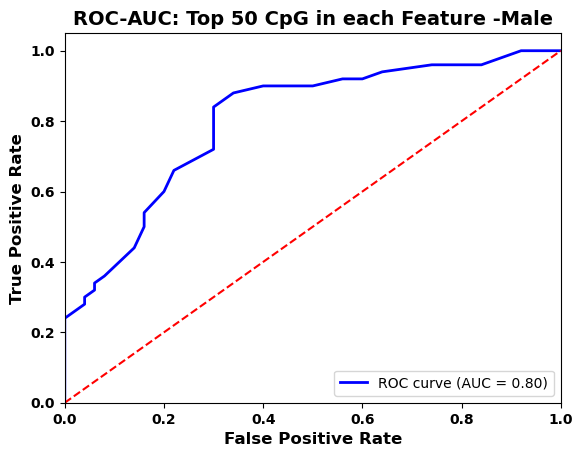

In [22]:
dataset = male.groupby('APPRDX').apply(lambda x: x.sample(50, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(tpr,fpr)

# Plot the ROC curve
plt.plot(tpr,fpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: Top 50 CpG in each Feature -Male', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_Top50CpG_eachFeat_Male.svg')
plt.savefig('ROC_AUC_Top50CpG_eachFeat_Male.pdf')
plt.show()
